## Movie Rating Prediction using Machine Learning

**Date**: 13 September 2023 <br/>
**Source type**: CSV Dataset <br/>
**Source url**: https://www.kaggle.com/datasets/ishikajohari/imdb-data-with-descriptions <br/>
**Author**: Silvere Cawet 218066347 <br/>

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

### Data Loading & Preparation

In [34]:
# Load the dataset
file_path = 'IMDB.csv'
df = pd.read_csv(file_path)

#### Sample snapshot

In [35]:
# Show the first few rows
df.head()

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,Description
0,0,0,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0,1991,\N,118,...,8.6,1473918,50,The Silence of the Lambs,US,en,\N,\N,0,"Jodie Foster stars as Clarice Starling, a top ..."
1,1,1,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0,1991,\N,137,...,8.6,1128166,17,Terminator 2: Judgment Day,US,en,dvd,\N,0,"In this sequel set eleven years after ""The Ter..."
2,2,3,tt0110357,movie,The Lion King,The Lion King,0,1994,\N,88,...,8.5,1090882,18,The Lion King 3D,US,en,\N,3-D version,0,This Disney animated feature follows the adven...
3,3,4,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,...,8.9,2118762,22,Pulp Fiction,US,en,\N,\N,0,Vincent Vega (John Travolta) and Jules Winnfie...
4,4,5,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,...,9.3,2759621,2,The Shawshank Redemption,US,en,\N,\N,0,Andy Dufresne (Tim Robbins) is sentenced to tw...


#### Descriptive statistics

In [36]:
# Show basic descriptive statistics
df.describe()

,Unnamed: 0,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7850.00000,7850.000000,7850.0,7850.000000,7850.000000,7.850000e+03,7850.000000,7850.0
mean,3924.50000,5286.804076,0.0,2013.204331,7.367605,7.527845e+04,16.440382,0.0
std,2266.24414,2851.482333,0.0,6.987697,0.605137,1.779794e+05,12.871290,0.0
min,0.00000,0.000000,0.0,1990.000000,6.500000,6.000000e+00,1.000000,0.0
25%,1962.25000,2847.250000,0.0,2008.000000,6.900000,6.035000e+03,6.000000,0.0
50%,3924.50000,5284.500000,0.0,2015.000000,7.300000,1.484150e+04,13.000000,0.0
75%,5886.75000,7602.750000,0.0,2019.000000,7.800000,5.660500e+04,24.000000,0.0
max,7849.00000,10274.000000,0.0,2023.000000,9.500000,2.759621e+06,119.000000,0.0


#### Info about the dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7850 non-null   int64  
 1   index            7850 non-null   int64  
 2   tconst           7850 non-null   object 
 3   titleType        7850 non-null   object 
 4   primaryTitle     7850 non-null   object 
 5   originalTitle    7850 non-null   object 
 6   isAdult          7850 non-null   int64  
 7   startYear        7850 non-null   int64  
 8   endYear          7850 non-null   object 
 9   runtimeMinutes   7850 non-null   object 
 10  genres           7850 non-null   object 
 11  averageRating    7850 non-null   float64
 12  numVotes         7850 non-null   int64  
 13  ordering         7850 non-null   int64  
 14  title            7850 non-null   object 
 15  region           7850 non-null   object 
 16  language         7850 non-null   object 
 17  types         

### Data Cleaning

<p>It appears that some columns have missing or placeholder values like '\N'</p>

In [38]:
# Identify columns with placeholders or missing values
missing_cols = df.columns[df.isin(['\\N']).any()].tolist()
print('Columns with placeholder values:\n')
print(missing_cols)
print('\nColumns with missing values:')
df[missing_cols].isna().sum()

Columns with placeholder values:

['endYear', 'runtimeMinutes', 'genres', 'types', 'attributes']

Columns with missing values:


endYear           0
runtimeMinutes    0
genres            0
types             0
attributes        0
dtype: int64

#### Replace placeholders & handle datatype conversions

In [39]:
# Replace placeholder '\N' with NaN
df.replace('\\N', np.nan, inplace=True)

# Convert 'runtimeMinutes' to numerical type
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Convert 'startYear' to datetime type
df['startYear'] = pd.to_datetime(df['startYear'], format='%Y', errors='coerce')

# Check for updated datatypes and missing values
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       7850 non-null   int64         
 1   index            7850 non-null   int64         
 2   tconst           7850 non-null   object        
 3   titleType        7850 non-null   object        
 4   primaryTitle     7850 non-null   object        
 5   originalTitle    7850 non-null   object        
 6   isAdult          7850 non-null   int64         
 7   startYear        7850 non-null   datetime64[ns]
 8   endYear          2161 non-null   object        
 9   runtimeMinutes   7727 non-null   float64       
 10  genres           7848 non-null   object        
 11  averageRating    7850 non-null   float64       
 12  numVotes         7850 non-null   int64         
 13  ordering         7850 non-null   int64         
 14  title            7850 non-null   object 

Unnamed: 0            0
index                 0
tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
endYear            5689
runtimeMinutes      123
genres                2
averageRating         0
numVotes              0
ordering              0
title                 0
region                0
language              0
types               370
attributes         7781
isOriginalTitle       0
Description         188
dtype: int64

#### Data preprocessing & feature selection

In [40]:
# Feature Selection: Drop unnecessary columns
selected_cols = ['titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes']
df_selected = df[selected_cols].copy()

# Encode categorical columns
label_encoder = LabelEncoder()
df_selected['titleType'] = label_encoder.fit_transform(df_selected['titleType'])
df_selected['genres'] = df_selected['genres'].astype(str).apply(lambda x: ''.join(sorted(x.split(',')))).astype('category')
df_selected['genres'] = label_encoder.fit_transform(df_selected['genres'])

# Fill missing values in 'runtimeMinutes' with median
df_selected['runtimeMinutes'].fillna(df_selected['runtimeMinutes'].median(), inplace=True)

# Extract Year from 'startYear' and standardize
df_selected['startYear'] = df_selected['startYear'].dt.year
scaler = StandardScaler()
df_selected[['startYear', 'runtimeMinutes', 'numVotes']] = scaler.fit_transform(df_selected[['startYear', 'runtimeMinutes', 'numVotes']])

# Check final dataframe
df_selected.head(), df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleType       7850 non-null   int32  
 1   isAdult         7850 non-null   int64  
 2   startYear       7850 non-null   float64
 3   runtimeMinutes  7850 non-null   float64
 4   genres          7850 non-null   int32  
 5   averageRating   7850 non-null   float64
 6   numVotes        7850 non-null   float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 368.1 KB


(   titleType  isAdult  startYear  runtimeMinutes  genres  averageRating  \
 0          0        0  -3.177835        0.266599     307            8.6   
 1          0        0  -3.177835        0.563487      77            8.6   
 2          0        0  -2.748481       -0.202173      85            8.5   
 3          0        0  -2.748481        0.829125     295            8.9   
 4          0        0  -2.748481        0.641616     353            9.3   
 
     numVotes  
 0   7.858936  
 1   5.916160  
 2   5.706662  
 3  11.482306  
 4  15.083283  ,
 None)

### Exploratory Data Analysis (EDA)

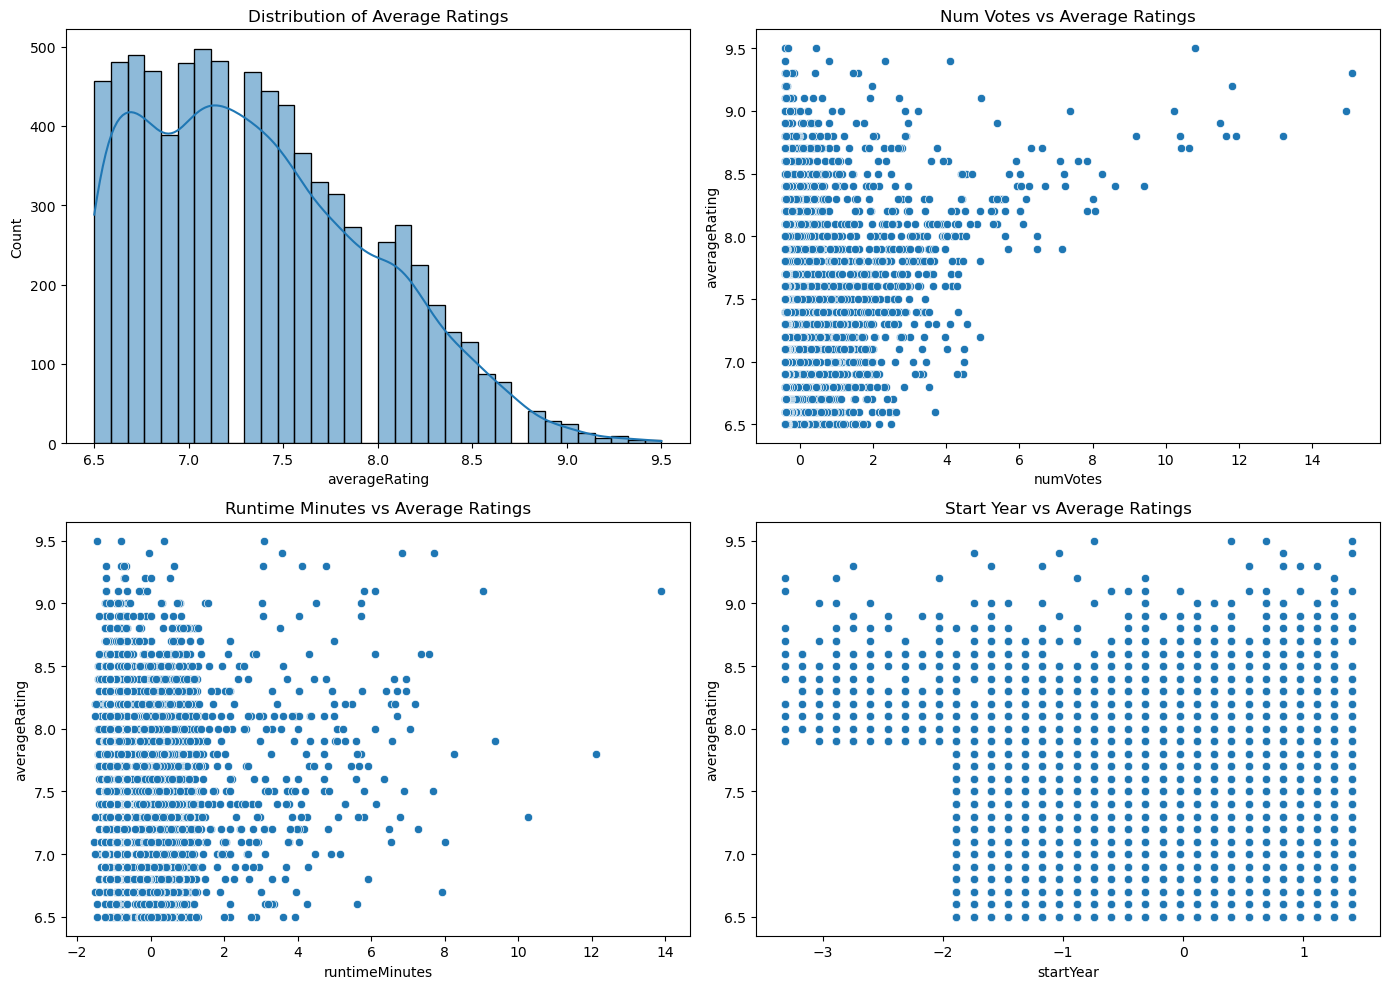

In [41]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting distribution of 'averageRating'
sns.histplot(df_selected['averageRating'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Average Ratings')

# Plotting 'numVotes' vs 'averageRating'
sns.scatterplot(x='numVotes', y='averageRating', data=df_selected, ax=axes[0, 1])
axes[0, 1].set_title('Num Votes vs Average Ratings')

# Plotting 'runtimeMinutes' vs 'averageRating'
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df_selected, ax=axes[1, 0])
axes[1, 0].set_title('Runtime Minutes vs Average Ratings')

# Plotting 'startYear' vs 'averageRating'
sns.scatterplot(x='startYear', y='averageRating', data=df_selected, ax=axes[1, 1])
axes[1, 1].set_title('Start Year vs Average Ratings')

plt.tight_layout()
plt.show()


#### Visualizations indicate:

- `averageRating` is normally distributed.
- Higher `numVotes` generally associate with higher ratings.
- No strong correlation between `runtimeMinutes` or `startYear` and `averageRating`.

### Model Selection

#### Supervised Learnig Techniques

We'll consider Linear Regression, Random Forest, and Gradient Boosting for predicting `averageRating`.

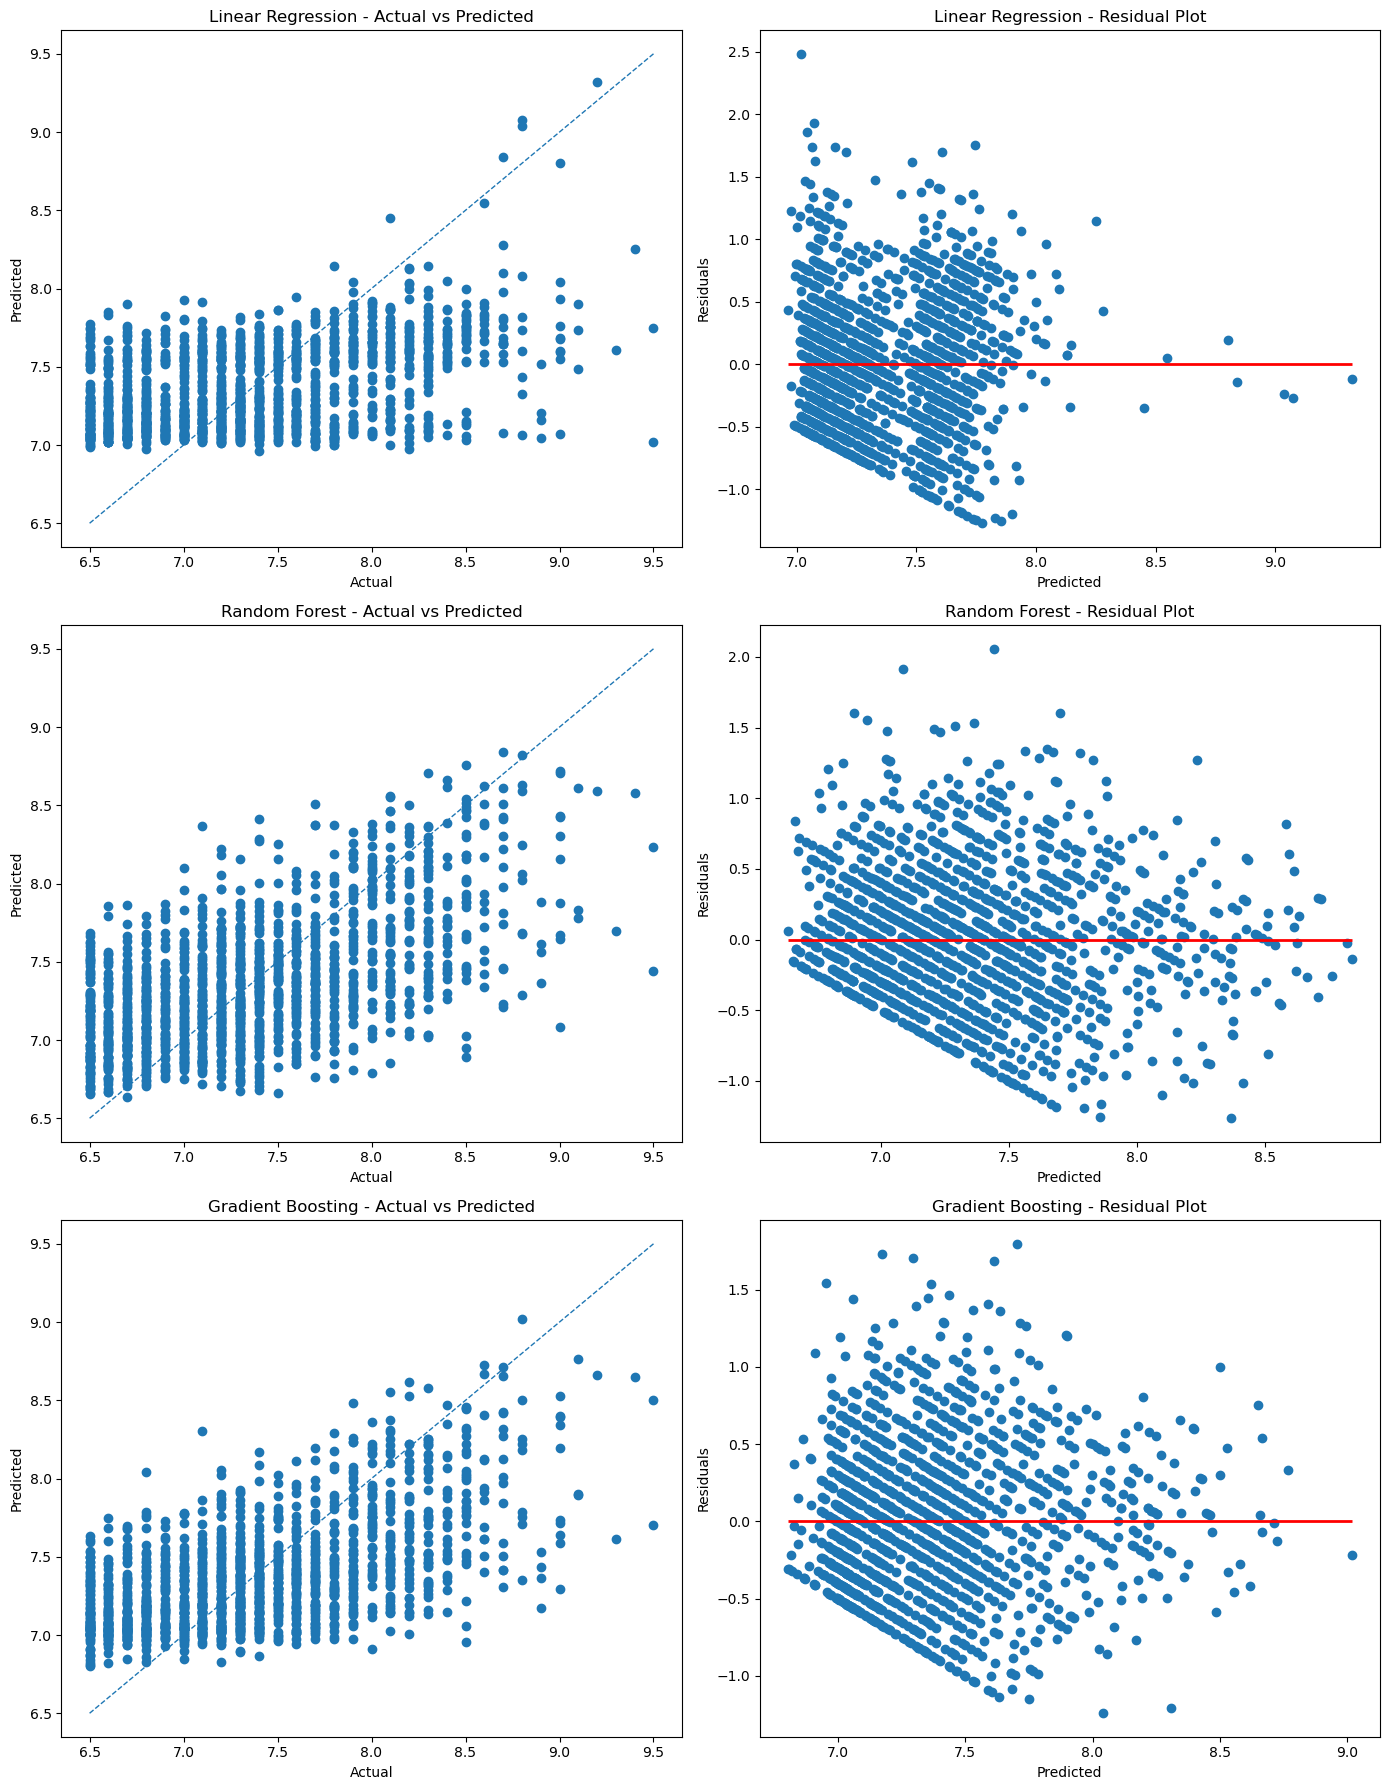

{'Linear Regression': 0.5410670791187685,
 'Random Forest': 0.49611663732875855,
 'Gradient Boosting': 0.4838751443314608}

In [42]:
# Data Splitting
X = df_selected.drop('averageRating', axis=1)
y = df_selected['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Model names
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Initialize result storage
model_metrics = {}

# Initialize figure for visualizations
fig, axes = plt.subplots(len(model_names), 2, figsize=(14, 18))

# Train and Evaluate models
for idx, (model, name) in enumerate(zip([linear_model, random_forest, gradient_boosting], model_names)):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_metrics[name] = rmse

    # Scatter Plot of Actual vs Predicted
    axes[idx, 0].scatter(y_test, y_pred)
    axes[idx, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=1)
    axes[idx, 0].set_title(f'{name} - Actual vs Predicted')
    axes[idx, 0].set_xlabel('Actual')
    axes[idx, 0].set_ylabel('Predicted')

    # Residual Plot
    residuals = y_test - y_pred
    axes[idx, 1].scatter(y_pred, residuals)
    axes[idx, 1].hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linewidth=2)
    axes[idx, 1].set_title(f'{name} - Residual Plot')
    axes[idx, 1].set_xlabel('Predicted')
    axes[idx, 1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

model_metrics


Gradient Boosting performs best with the lowest RMSE.

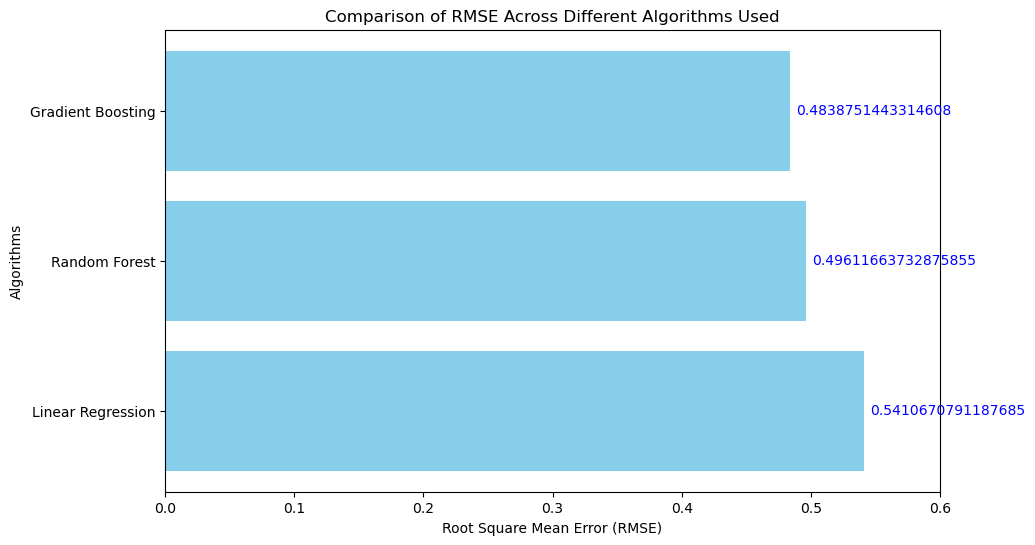

In [44]:
# Create a bar chart for RMSE visualization
plt.figure(figsize=(10, 6))
plt.barh(list(model_metrics.keys()), list(model_metrics.values()), color='skyblue')
plt.xlabel('Root Square Mean Error (RMSE)')
plt.ylabel('Algorithms')
plt.title('Comparison of RMSE Across Different Algorithms Used')
plt.xlim(0, 0.6)  # Assuming RMSE values are between 0 and 0.6

# Annotate the bars with the RMSE values
for i, v in enumerate(list(model_metrics.values())):
    plt.text(v + 0.005, i, str(v), color='blue', verticalalignment='center')

plt.show()

### Unsupervised Learning Techniques

#### Clustering

Find Optimal Cluster Number (Elbow Method)

Distortions:
[136124968.80917203, 37191209.551816985, 11329954.11453512, 6100096.812549505, 4110045.0295363963, 2754408.516669385, 2000735.138689007, 1457826.9913679862, 1183970.8712222425, 931481.4316818197]


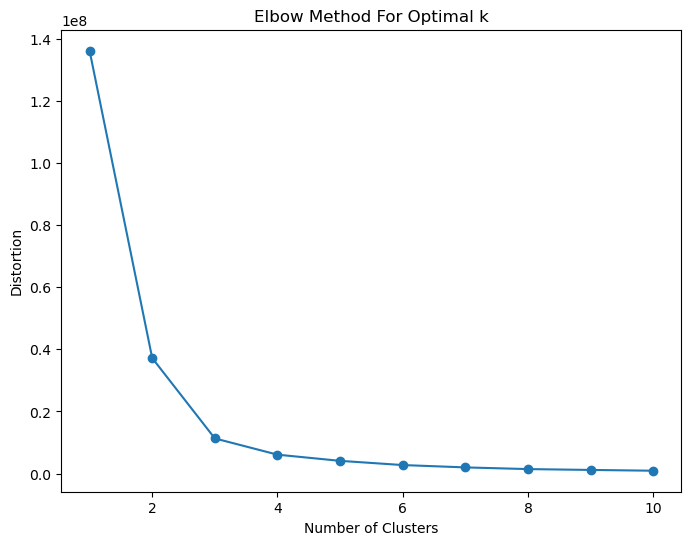

In [50]:
# Data for clustering
X = df_selected.drop('averageRating', axis=1)

# Calculate distortions for different number of clusters
distortions = []
K_range = range(1, 11)
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

print('Distortions:')
print(distortions)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

The "elbow" point is where the distortion starts to decrease at a slower rate. In this case, it seems like the distortion decreases significantly up to 3 or 4 clusters, then slows down. Let's go with 4 clusters

In [54]:
# Initialize K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model
kmeans.fit(X)

# Get cluster labels and attach them to the original dataframe
df_selected['Cluster'] = kmeans.labels_

# Summary statistics for each cluster
cluster_summary = df_selected.groupby('Cluster').mean()
cluster_summary


,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
Cluster,,,,,,,
0,1.588263,0.0,-0.043514,0.004257,45.173664,7.356107,0.281044
1,2.124910,0.0,0.065894,0.030766,301.619526,7.455707,-0.098331
2,1.835762,0.0,-0.014331,-0.115662,211.838852,7.368079,-0.122700
3,1.471851,0.0,0.015208,0.100285,385.270515,7.320038,-0.083100


- Cluster 0:
- Mainly titleType around 1.59 (after encoding).
- Higher averageRating of 7.36 and higher numVotes (0.28).

- Cluster 1:
- Mainly titleType around 2.12.
- Highest averageRating of 7.46 but lower numVotes (-0.09).

- Cluster 2:
- Mainly titleType around 1.83.
- Moderate averageRating of 7.37 and lowest numVotes (-0.12).

- Cluster 3:
- Mainly titleType around 1.47.
- Lower averageRating of 7.32 and moderate numVotes (-0.08).

Note: The values are standardized, so the signs and magnitudes indicate relative differences.

Each cluster represents a group of movies with similar characteristics. This clustering can be useful for recommending similar movies or understanding patterns in movie ratings.

##### Cluster visualisation

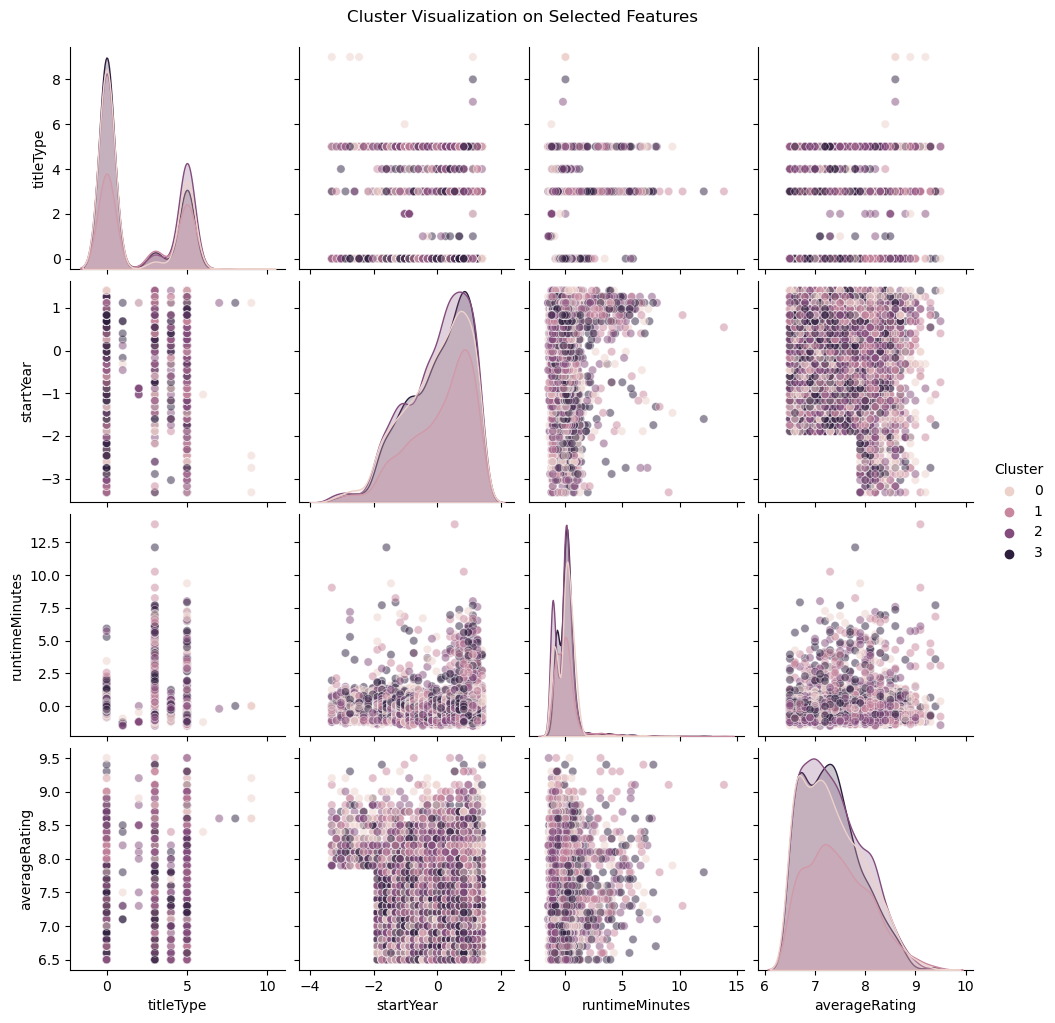

In [55]:
# Visualize the clusters using pairplot (taking a subset of columns for better visualization)
sns.pairplot(df_selected[['titleType', 'startYear', 'runtimeMinutes', 'averageRating', 'Cluster']], hue='Cluster', plot_kws={'alpha':0.5})
plt.suptitle('Cluster Visualization on Selected Features', y=1.02)
plt.show()

## Comprehensive Conclusion

#### Data Preparation
We began our journey with raw data from IMDb, consisting of various movie attributes. Initial steps involved cleaning the dataset by replacing placeholders, converting data types, and handling missing values.

#### Feature Selection
Seven critical features (titleType, isAdult, startYear, runtimeMinutes, genres, averageRating, numVotes) were selected for further analysis. Categorical variables were encoded, and numerical variables were standardized to prepare the data for machine learning models.

#### Exploratory Data Analysis (EDA)
Through EDA, we gained valuable insights:

- averageRating followed a normal distribution.
- A positive correlation was observed between numVotes and averageRating.
- No strong correlation was found between averageRating and other features like runtimeMinutes or startYear.

### Supervised Learning

* Three machine learning algorithms were employed for predicting averageRating:

- Linear Regression had the highest RMSE of 0.541, making it the least accurate.
- Random Forest yielded an RMSE of 0.496
- Gradient Boosting performed best with an RMSE of 0.484.

* Visualizations were also provided to better understand the model performance and residuals.

### Unsupervised Learning

K-means clustering was applied to segment the movies into four distinct clusters based on their features. Each cluster represented a unique combination of features, helping in the understanding of patterns and aiding in recommendations.

* Clusters were visualized using pairplots to demonstrate the grouping of movies based on selected features.

#### Key Takeaways

- Gradient Boosting emerged as the most accurate model for predicting averageRating.
- K-means clustering successfully segmented movies, offering avenues for targeted recommendations or further analysis.
- The analysis showcases the power of data science in turning raw information into actionable insights, effective predictive models, and a deeper understanding of the dataset.